# Homework2: Variational inference and VAE

## Task 1: Theory (5pt)

### Problem 1: IWAE theory (1pt)

In Lecture 3 we discussed [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (q, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) \rightarrow \max_{q, \boldsymbol{\theta}}.
$$

Here we had the theorem without proof:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ is bounded.

Now it is time to prove it :)

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $\mathcal{L}_K (q, \boldsymbol{\theta})$
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
$$
    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


```
your solution
```

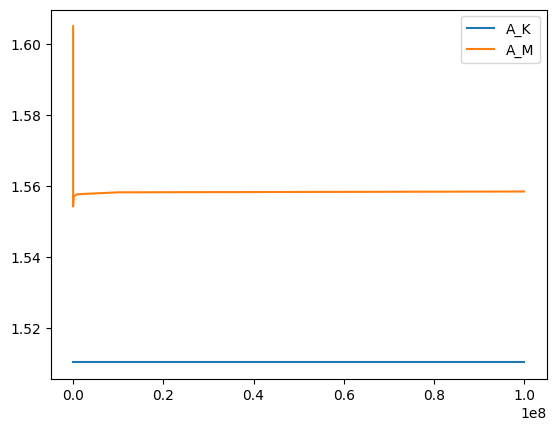

In [ ]:
import torch
from torch.distributions import Uniform

K = 10
M = 100000000

distribution = Uniform(low=1, high=K)
a_k = torch.arange(1, K+1)
a_k_m = distribution.sample([M])
# print(torch.sum(a_k) / K, torch.sum(a_k_m) / M)
# print(torch.sum(torch.log(a_k) / K), torch.sum(torch.log(a_k_m) / M))

graf_a_k = []
graf_a_m = []
for i in [1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]:
  a_k = torch.arange(1, K+1)
  a_m = distribution.sample([int(i)])
  graf_a_k.append(torch.sum(torch.log(a_k) / K))
  graf_a_m.append(torch.sum(torch.log(a_m) / int(i)))

plt.plot([1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8], graf_a_k)
plt.plot([1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8], graf_a_m)
plt.legend(['A_K', 'A_M'])
plt.show()

### Problem 2: EM-algorithm for GMM (4pt)

**Do not worry:** the task is long-written, but it is very useful for the understanding of the EM-algorithm and it is not very hard :)

Recall the Gaussian Mixture Model (GMM) we discussed in Seminar 3:

- model parameters $\boldsymbol{\theta} = \{ \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \boldsymbol{\Sigma}_{1:K} \}$;

- prior distribution (note that here it also depends on $\boldsymbol{\theta}$) $p(z | \boldsymbol{\theta}) = \text{Categorical}(\pi_1, \dots \pi_K)$;

- generative distribution $p(\mathbf{x} | z, \boldsymbol{\theta}) = \mathcal{N}\left(\mathbf{x}|, \boldsymbol{\mu}_z, \boldsymbol{\Sigma}_z\right)$.

Given samples $\mathbf{X} = \{\mathbf{x}_1, \dots, \mathbf{x}_n\} \sim p(\mathbf{x})$ , $\mathbf{x}_i \in \mathbb{R}^m$ we want to fit GMM model via **MLE**:

$$
\boldsymbol{\theta}^{*} = \arg\max\limits_{\boldsymbol{\theta}} \log p(\mathbf{X} | \boldsymbol{\theta}) = \arg\max\limits_{\boldsymbol{\theta}}\sum\limits_{i = 1}^{n} \log \left(\sum\limits_{k = 1}^{K}  \pi_k \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right).
$$

The direct solution of the problem above is hard and we substitute **MLE** optimization with **ELBO** optimization:

$$
\boldsymbol{\theta}^{\#} = \arg\max\limits_{q, \boldsymbol{\theta}} \mathcal{L}(q, \boldsymbol{\theta}) = \arg\max\limits_{q, \boldsymbol{\theta}} \int\limits_{Z^n} q(z_1, \dots, z_n) \log\frac{ p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) }{ q(z_1, \dots, z_n) } \prod\limits_{i = 1}^{n} d z_i.
$$

Since the pairs $(\mathbf{x}_1, z_1), \dots ,(\mathbf{x}_N, z_n)$ are mutually independent, the distributions could be factorized:
$$
    q(z_1, \dots, z_n) = \prod_{i=1}^n q(z_i); \quad p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) = \prod_{i=1}^n p(\mathbf{x}_i, z_i | \boldsymbol{\theta}).
$$
$$
\mathcal{L}(q, \boldsymbol{\theta}) = \sum\limits_{i = 1}^{n} \int\limits_{Z} q(z_i) \log\frac{ p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) }{ q(z_i) } d z_i.
$$

In the equations above we treet $q(\cdot)$ as continuous density function. In our case $q(\cdot)$ is discrete categorical distribution and all integrals are substituted with the corresponding sums:

$$
\int\limits_{Z} f(z) q(z) dz \longrightarrow \sum\limits_{k = 1}^{K} f(k) q(\{z = k\}).
$$

**ELBO** optimization could be done via EM-algorithm:

#### EM-algorithm

* **E-step**

    $$
    q(z_i) = p(z_i | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}).
    $$
    
    Note, that $q(z_i)$ is a categorical distribution over $K$ components: $q(z_i) = \text{Categorical}(\xi_1^i, \xi_2^i, \dots, \xi_K^i)$.

* **M-step**

    \begin{align}
    \boldsymbol{\theta}^{\text{new}} &= \arg\max\limits_{\boldsymbol{\theta}} \sum\limits_{i = 1}^{n} E_{z_i \sim q(z_i)} \log p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) \\
    &= \arg\max\limits_{\boldsymbol{\theta}}  \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}).
    \end{align}
    
#### E- and M- steps derivations
    
Recall the derivation of **E-step** from the class:

$$
q(\{z_i = k\}) = \xi_k^i = p(\{z = k\} | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}) \overset{\text{Bayes theorem}}{=} \frac{\pi_k \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum\limits_{k' = 1}^{K} \pi_{k'} \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_{k'}, \boldsymbol{\Sigma}_{k'})}.
$$

**M-step** is a bit harder. Let's denote

$$
\Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) := \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}) =\\= \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \left(\log \pi_k - \frac{m}{2} \log 2 \pi - \frac{1}{2} \log \det \boldsymbol{\Sigma}_k - \frac{1}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k)\right).
$$

Let's maximize $\Phi(\cdot)$ with respect to parameters $\boldsymbol{\pi}_{1:K}$, $\boldsymbol{\mu}_{1:K}$, $\boldsymbol{\Sigma}_{1:K}$ separately:

1. Maximization with respect to $\boldsymbol{\pi}_{1:K}$:
$$
\arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \log \pi_k = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{k = 1}^{K} \log \left(\pi_k \right) \sum\limits_{i = 1}^{n} \xi_k^i.
$$

    **Subproblem 2.1 (1.5pt):** Prove, that the $\arg\max$ problem above has solution $\pi_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \xi_k^i}{n}$, $k \in 1, 2, \dots K$.
    
2. Maximization with respect to $\boldsymbol{\mu}_{1:K}$. Let's take the derivative:
$$
\frac{\partial}{\partial \boldsymbol{\mu}_k} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \frac{\partial}{\partial \boldsymbol{\mu}_k} \sum\limits_{i = 1}^{n} - \frac{\xi_{k}^{i}}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k) = \sum\limits_{i = 1}^{n} \left(\boldsymbol{\Sigma}_k^{-1} \mathbf{x}_i - \boldsymbol{\Sigma}_k^{-1} \boldsymbol{\mu}_k\right) \xi_k^i = \boldsymbol{\Sigma}_k^{-1} \sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0.
$$

    Since $\boldsymbol{\Sigma}_k^{-1}$ is positive definite, the equation above could be written as follows:
    
$$
\sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0 \quad \Rightarrow \quad \boldsymbol{\mu}_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \mathbf{x}_i \xi_k^i}{\sum\limits_{i = 1}^{n} \xi_k^i}.
$$
    
3. Maximization with respect to $\boldsymbol{\Sigma}_{1:K}$.

    **Subproblem 2.2 (1.5pt):** Prove, that  
$$
\boldsymbol{\Sigma}^{\text{new}}_k = \frac{1}{\sum\limits_{i = 1}^{n} \xi_k^i} \sum\limits_{i = 1}^{n} \xi_{k}^{i} \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right) \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right)^T.
$$

    *Hint 1*: $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.
    
    *Hint 2*: $\frac{\partial}{\partial \mathbf{A}} \mathbf{x}^T \mathbf{A}^{-1} \mathbf{y} = - (\mathbf{A}^{-1})^T \mathbf{x} \mathbf{y}^T (\mathbf{A}^{-1})^T$.
    
    *General Hint*: there is a nice book that helps in working with matrices [matrixcookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf).
    
    **Subproblem 2.3 (1pt):** Prove, that $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.

    *Hint*: Recall the notion of *cofactor* or *adjunct* (алгебраическое дополнение) ([wiki_en](https://en.wikipedia.org/wiki/Minor_(linear_algebra)), [wiki_ru](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5)) from Linear Algebra courses.

```
your solution
```

In [19]:
REPO_NAME = "2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2023-DGM-MIPT-course'...
remote: Enumerating objects: 1071, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 1071 (delta 146), reused 212 (delta 131), pack-reused 835 (from 1)
Receiving objects: 100% (1071/1071), 404.46 MiB | 32.33 MiB/s, done.
Resolving deltas: 100% (429/429), done.
Updating files: 100% (353/353), done.
Processing ./2023-DGM-MIPT-course/homeworks
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import show_samples, visualize_images, load_dataset

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

## Task 2: VAE on CIFAR10 data (4pt)

In this task you will implement VAE model for CIFAR10 dataset.

Let download and visualize samples from the dataset.

100%|██████████| 170M/170M [00:04<00:00, 42.3MB/s]


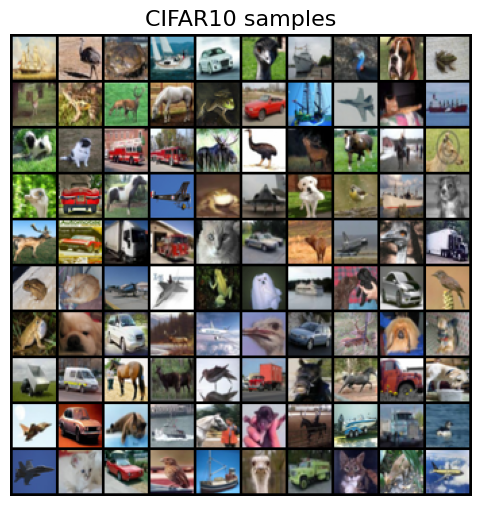

In [21]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Now it is time to define our model. Our model will have the following structure:

* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. We will assume that covariance matrice $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ is diagonal.
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ (means of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$) as model samples.
* Our encoder and decoder will be convolutional neural networks.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. It a standard heuristics that allows to get more accurate model. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.


To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, \mathbf{I})$.

Let start with the helper functions.

In [ ]:
def get_normal_KL(
    mean_1: torch.Tensor,
    log_std_1: torch.Tensor,
    mean_2: Optional[torch.Tensor] = None,
    log_std_2: Optional[torch.Tensor] = None,
) -> torch.Tensor:
    """
    :Parameters:
    mean_1: means of normal distributions (1)
    log_std_1 : standard deviations of normal distributions (1)
    mean_2: means of normal distributions (2)
    log_std_2 : standard deviations of normal distributions (2)
    :Outputs:
    kl divergence of the normal distributions (1) and normal distributions (2)
    ---
    This function should return the value of KL(p1 || p2),
    where p1 = Normal(mean_1, exp(log_std_1) ** 2), p2 = Normal(mean_2, exp(log_std_2) ** 2).
    If mean_2 and log_std_2 are None values, we will use standard normal distribution.
    Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
    assert mean_1.shape == log_std_1.shape == mean_2.shape == log_std_2.shape
    # ====
    # your code

    std_1 = torch.exp(log_std_1)
    std_2 = torch.exp(log_std_2)

    kl = (log_std_2 - log_std_1) + (torch.exp(log_std_1).pow(2) + (mean_1 - mean_2).pow(2)) / (2 * torch.exp(log_std_2).pow(2)) - 0.5
    # kl = (log_std_2 - log_std_1) + (std_1.pow(2) + (mean_1 - mean_2).pow(2)) / (2 * std_2.pow(2)) - 0.5
    return kl
    # ====


def test_KL():
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)
        ).numpy(),
        200.2144,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)
        ).numpy(),
        1.50925,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_KL(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        [49.2990, 1498.479],
        rtol=1e-3,
    )


test_KL()

In [ ]:
def get_normal_nll(
    x: torch.Tensor, mean: torch.Tensor, log_std: torch.Tensor
) -> torch.Tensor:
    """
    This function should return the negative log likelihood log p(x),
    where p(x) = Normal(x | mean, exp(log_std) ** 2).
    Note that we consider the case of diagonal covariance matrix.
    """
    # ====
    # your code
    nll = 0.5*torch.log(2*torch.pi*torch.exp(log_std).pow(2)) + (x - mean).pow(2)/(2*torch.exp(log_std).pow(2))
    return nll
    # ====


def test_NLL():
    assert np.isclose(
        get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(),
        3.9189,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(),
        6.9191,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_nll(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        np.array([3.9982, 5.9197]),
        rtol=1e-3,
    )


test_NLL()

Let define our convolutional encoder and decoder.

In [ ]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape: tuple, n_latent: int) -> None:
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # your code
        # we suggest to use the following architecture
        # conv2d(32) -> relu -> conv(64) -> relu -> conv(128) -> relu -> conv(256) -> fc(2 * n_latent)
        # but we encourage you to create your own architecture
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=2),
        )
        self.flat = nn.Flatten()
        self.fc = nn.Linear(256, 2 * n_latent)
        # ====

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) apply convs
        # 2) reshape the output to 2d matrix for last fc layer
        # 3) apply fc layer
        conv_module = self.model(x)

        out = self.fc(self.flat(conv_module))
        mu, log_std = torch.split(out, self.n_latent, dim=1)
        # ====
        return mu, log_std


class ConvDecoder(nn.Module):
    def __init__(self, n_latent: int, output_shape: tuple) -> None:
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape

        self.base_size = (128, output_shape[1] // 8, output_shape[2] // 8)
        # ====
        # your code
        # we suggest to use the following architecture
        # fc -> conv2dtranspose(128) -> relu -> conv2dtranspose(64) -> relu
        # -> conv2dtranspose(32) -> relu -> conv2dtranspose(3)
        # but we encourage you to create your own architecture
        self.fc = nn.Linear(n_latent, 128 * (output_shape[1] // 8) * (output_shape[2] // 8))
        self.model = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, stride=2, padding=1)
        )
        # ====

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) apply fc layer
        # 2) reshape the output to 4d tensor
        # 3) apply conv layers
        out = self.fc(z)
        out = out.reshape([z.shape[0], *self.base_size])
        out = self.model(out)
        # ====
        return out


def test_conv_models():
    test_enc = ConvEncoder((3, 32, 32), n_latent=10)
    inp = torch.randn((4, 3, 32, 32))
    mu, std = test_enc(inp)

    assert list(mu.shape) == [4, 10]
    assert list(std.shape) == [4, 10]

    test_dec = ConvDecoder(10, (3, 32, 32))
    inp = torch.randn(4, 10)
    assert list(test_dec(inp).shape) == [4, 3, 32, 32]


test_conv_models()

Now it is time to implement VAE model for image dataset.

In [ ]:
class ConvVAE(nn.Module):
    def __init__(self, input_shape: tuple, n_latent: int, beta: float = 1) -> None:
        super().__init__()
        assert len(input_shape) == 3

        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta

        self.init_submodels()

    def init_submodels(self):
        # ====
        # your code
        # define encoder with input size input_shape and output dim n_latent
        # define decoder with input dim n_latent and output size input_shape
        self.encoder = ConvEncoder(self.input_shape, self.n_latent)
        self.decoder = ConvDecoder(self.n_latent, self.input_shape)
        # ====

    @property
    def device(self):
        return next(self.parameters()).device

    def prior(self, n: int) -> torch.Tensor:
        # ====
        # your code
        # return n samples from prior distribution (we use standart normal for prior)
        z = torch.randn(n, self.n_latent)
        # ====

        z = z.to(self.device)
        return z

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)
        mu_z, log_std_z = self.encoder(x)
        eps = torch.randn_like(mu_z)
        z = mu_z + eps * torch.exp(log_std_z)
        x_recon = self.decoder(z)
        # ====
        return mu_z, log_std_z, x_recon

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        # your code
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)
        mu_z, log_std_z, x_recon = self.forward(x)
        recon_loss = get_normal_nll(x, x_recon, torch.zeros_like(x_recon)).sum()
        kl_loss = get_normal_KL(mu_z, log_std_z).sum()
        # ====
        return {
            "elbo_loss": recon_loss + self.beta * kl_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def sample(self, n: int) -> np.ndarray:
        with torch.no_grad():
            # ====
            # your code
            # 1) generate prior samples
            # 2) apply decoder
            z = self.prior(n)
            x_recon = self.decoder(z)
            # ====
            samples = torch.clamp(x_recon, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 256  # any adequate value
EPOCHS = 50      # < 16
LR = 1e-4         # < 1e-3
N_LATENS = 1024    # 128 < _ < 1024
BETA = 0.3       # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    loss_key="elbo_loss",
    use_tqdm=True,
    use_cuda=USE_CUDA,
)
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

NameError: name 'train_data' is not defined

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok, that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

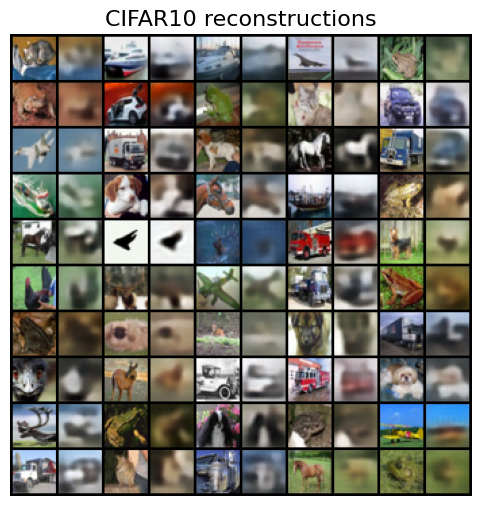

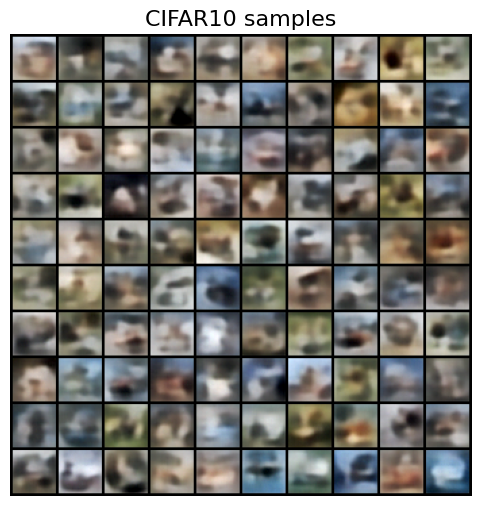

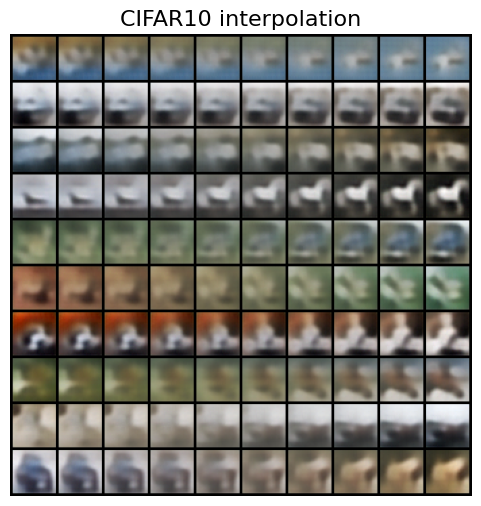

In [ ]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

x = x.to(model.device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to(model.device)
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [
        model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)
    ]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, "CIFAR10 reconstructions")
show_samples(samples, "CIFAR10 samples")
show_samples(interps, "CIFAR10 interpolation")

## Task 3: ResNetVAE on CIFAR10 data (4pt)

Now we will try to make our architecture more powerful. Let try to use ResNet-like encoder and decoder.

First of all let define basic ResNet block. It will be the basic block for our encoder.

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, final_relu=True):
        super().__init__()
        self.final_relu = final_relu
        # ====
        # your code
        # here you could try different network structures
        # we suggest to use the following:
        # residual(x) = conv(bn(relu(conv(bn(x)))))
        # output = relu(conv1x1(input) + residual(input))
        self.residual = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=(kernel_size//2), bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(out_channels),
            nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=(kernel_size//2), bias=False)
        )

        self.shortcut = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.Conv2d(
                in_channels, out_channels,
                kernel_size=1,
                stride=stride,
                bias=False
            ),
            nn.ReLU()
        )

        self.relu2 = nn.ReLU()
        # ====

    def forward(self, x):
        # ====
        # your code
        residual = self.residual(x)
        shortcut = self.shortcut(x)
        result = shortcut + residual
        # ====
        if self.final_relu:
            result = self.relu2(result)

        return result


def test_resnet_block():
    test_inp = torch.randn(5, 64, 128, 128)

    for out_channels in [64, 128]:
        for kernel_size in [3, 5, 7]:
            for stride in [1, 2, 4]:
                resnet_block = ResNetBlock(in_channels=64, out_channels=out_channels,
                                        kernel_size=kernel_size, stride=stride)
                assert list(resnet_block(test_inp).shape) == [5, out_channels, 128 // stride, 128 // stride]


test_resnet_block()

Now let define basic ResNet block. It will be the basic block for our decoder.

In [ ]:
class ResNetTransposeBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, final_relu=True):
        super().__init__()
        self.final_relu = final_relu
        # ====
        # your code
        # here you could try different network structures
        # we suggest to use the following:
        # output = conv(bn(f(input))) + f(input), where:
        # f(x) = upconv(bn(x))
        self.f = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=kernel_size // 2, output_padding = stride - 1, bias=False)
        )
        self.block = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        )
        self.relu1 = nn.ReLU()
        # ====

    def forward(self, x):
        # ====
        # your code
        result = self.f(x) + self.block(self.f(x))
        # ====
        if self.final_relu:
            result = self.relu1(result)
        return result


def test_resnet_transposed_block():
    test_inp = torch.randn(5, 64, 64, 64)
    for out_channels in [64, 128]:
        for kernel_size in [3, 5, 7]:
            for stride in [2, 4]:
                resnet_block = ResNetTransposeBlock(
                    in_channels=64, out_channels=out_channels, kernel_size=kernel_size, stride=stride)
                assert list(resnet_block(test_inp).shape) == [5, out_channels, 64 * stride, 64 * stride]


test_resnet_transposed_block()

Now we are to define our encoder and decoder.

In [ ]:
class ConvResNetEncoder(nn.Module):
    def __init__(self, input_shape, n_latent):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # your code
        # our suggestions:
        # - try to combine multiple resnet blocks
        # - place Flatten + Linear at the end
        self.model = nn.Sequential(
            ResNetBlock(input_shape[0], 16, stride=2),
            ResNetBlock(16, 32, stride=2)
        )
        self.flat = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(32*input_shape[1]//4*input_shape[2]//4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2*self.n_latent),
        )
        # ====

    def forward(self, x):
        # ====
        # your code
        # apply all blocks defined in init
        # split output tensor to mu and log_std
        out = self.model(x)
        out = self.flat(out)
        out = self.fc(out)
        mu, log_std = torch.split(out, self.n_latent, dim=1)
        log_std = torch.clamp(log_std, min=-20, max=20)
        # ====
        return mu, log_std


class ConvResNetDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape
        # ====
        # your code
        # our suggestions:
        # - apply linear layer to the input
        # - reshape output matrix to 4-dims tensor
        # - try to combine multiple resnet transposed blocks
        self.fc = self.fc = nn.Sequential(
            nn.Linear(self.n_latent, 1024),
            nn.ReLU(),
            nn.Linear(1024, 32*output_shape[1]//4*output_shape[2]//4)  # Adjust based on your input size
        )
        self.model = nn.Sequential(
            ResNetTransposeBlock(32, 16, stride=2),
            ResNetTransposeBlock(16, 8, stride=2),
            ResNetTransposeBlock(8, output_shape[0], stride=1),
            nn.Sigmoid()
        )
        # ====

    def forward(self, z):
        # ====
        # your code
        # apply all blocks defined in init
        out = self.fc(z)
        out = out.reshape(z.shape[0], 32, output_shape[1]//4, output_shape[2]//4)
        out = self.model(out)
        # ====
        return out


def test_convresnet_models():
    test_enc = ConvResNetEncoder((3, 32, 32), n_latent=10)
    inp = torch.randn((4, 3, 32, 32))
    mu, std = test_enc(inp)

    assert list(mu.shape) == [4, 10]
    assert list(std.shape) == [4, 10]

    test_dec = ConvResNetDecoder(10, (3, 32, 32))
    inp = torch.randn(4, 10)
    assert list(test_dec(inp).shape) == [4, 3, 32, 32]


test_convresnet_models()

RuntimeError: running_mean should contain 16 elements not 24

Our new VAE model will be almost the same as the previous one.

In [ ]:
class ConvResNetVAE(ConvVAE):
    def init_submodels(self):
        # ====
        # your code
        # it is the only method that we have to redefine
        self.encoder = ConvResNetEncoder(self.input_shape, self.n_latent)
        self.decoder = ConvResNetDecoder(self.n_latent, self.input_shape)
        # ====

    def vae_loss(recon_x, x, mu, log_var):
        # Reconstruction loss (binary cross entropy)
        BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
        # KL divergence
        KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        return BCE + KLD

That is all! We are ready to train our model.

  0%|          | 0/50 [00:00<?, ?it/s]

elbo_loss: 15819483.2606
recon_loss: 401189.0590
kl_loss: 2569715.6952


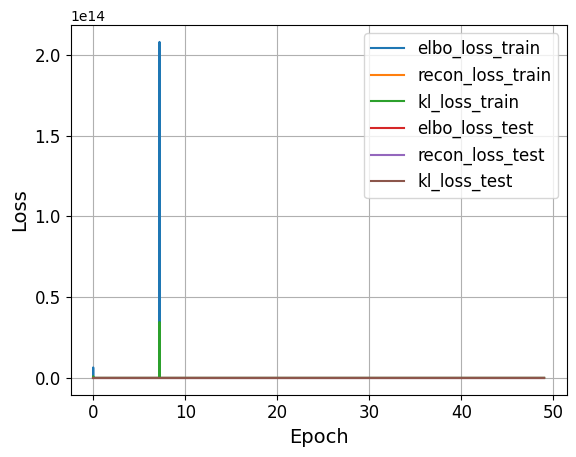

In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 128  # any adequate value
EPOCHS = 50      # < 16
LR = 1e-3          # < 1e-3
N_LATENS = 1024    # 128 < _ < 1024
BETA = 6        # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvResNetVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    loss_key="elbo_loss",
    use_tqdm=True,
    use_cuda=USE_CUDA,
)
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Let visualize model samples.

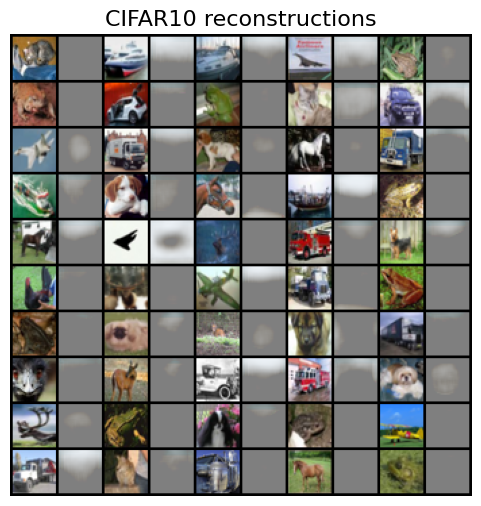

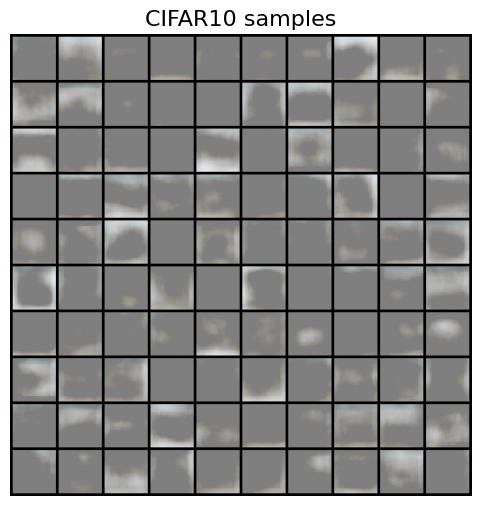

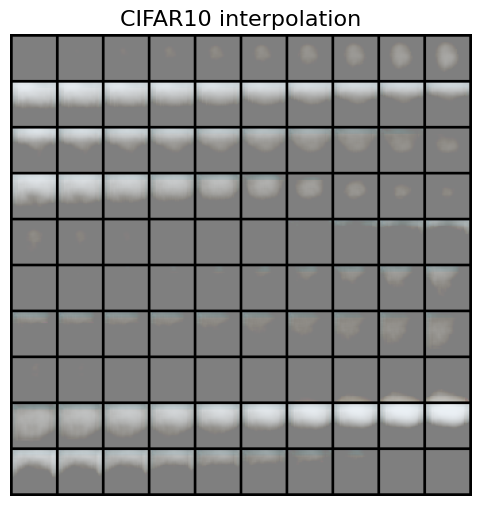

In [ ]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

x = x.to(model.device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to(model.device)
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')

Try to compare values of losses and samples for ConvVAE and ConvResNetVAE.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision.utils import save_image
import os
from tqdm import tqdm

In [2]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

In [3]:
class ResNetEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(ResNetEncoder, self).__init__()

        self.in_channels = 32

        # Initial convolution
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        # Residual blocks
        self.layer1 = self._make_layer(32, 2)
        self.layer2 = self._make_layer(64, 2, stride=2)
        self.layer3 = self._make_layer(128, 2, stride=2)
        self.layer4 = self._make_layer(256, 2, stride=2)

        # Fully connected layers for mean and variance
        self.fc_mu = nn.Linear(256 * 4 * 4, latent_dim)
        self.fc_var = nn.Linear(256 * 4 * 4, latent_dim)

    def _make_layer(self, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(ResidualBlock(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = torch.flatten(x, start_dim=1)

        mu = self.fc_mu(x)
        log_var = self.fc_var(x)

        return mu, log_var

In [28]:
class ResNetDecoder(nn.Module):
    def __init__(self, latent_dim):
        super(ResNetDecoder, self).__init__()

        self.fc = nn.Linear(latent_dim, 256 * 4 * 4)

        self.in_channels = 256

        # Residual blocks
        self.layer1 = self._make_layer(256, 4)
        self.layer2 = self._make_layer(128, 4, upsample=True)
        self.layer3 = self._make_layer(64, 4, upsample=True)
        self.layer4 = self._make_layer(32, 4, upsample=True)

        # Final layers
        self.conv = nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1)
        self.sigmoid = nn.Sigmoid()

    def _make_layer(self, out_channels, blocks, upsample=False):
        layers = []

        for _ in range(blocks):
            if upsample and _ == 0:
                layers.append(ResidualBlockUp(self.in_channels, out_channels))
            else:
                layers.append(ResidualBlock(self.in_channels, out_channels))
            self.in_channels = out_channels

        return nn.Sequential(*layers)

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 256, 4, 4)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.conv(x)
        # x = self.sigmoid(x)

        return x


class ResidualBlockUp(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlockUp, self).__init__()
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        residual = self.upsample(x)
        residual = self.downsample(residual)

        out = self.upsample(x)
        out = self.conv1(out)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += residual
        out = self.relu(out)

        return out

In [29]:
class ResNetVAE(nn.Module):
    def __init__(self, latent_dim):
        super(ResNetVAE, self).__init__()
        self.encoder = ResNetEncoder(latent_dim)
        self.decoder = ResNetDecoder(latent_dim)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_recon = self.decoder(z)
        return x_recon, mu, log_var

In [30]:
class VGGLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = models.vgg16(pretrained=True).features[:16].eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, input, target):
        input_vgg = self.vgg(input)
        target_vgg = self.vgg(target)
        return F.mse_loss(input_vgg, target_vgg)

def vae_loss(recon_x, x, mu, log_var):
    # device = torch.device('cuda')
    # Reconstruction loss (binary cross entropy)
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')

    # KL divergence
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    # perceptual_loss = VGGLoss().to(device) / * perceptual_loss(recon_x, x)
    return BCE + KLD + 0.1

In [31]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(tqdm(train_loader)):
        data = data.to(device)
        optimizer.zero_grad()

        recon_batch, mu, log_var = model(data)
        loss = vae_loss(recon_batch, data, mu, log_var)

        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    print(f'Train Epoch: {epoch} \tAverage Loss: {avg_loss:.4f}')
    return avg_loss


def test(model, device, test_loader):
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon_batch, mu, log_var = model(data)
            test_loss += vae_loss(recon_batch, data, mu, log_var).item()

    avg_loss = test_loss / len(test_loader.dataset)
    print(f'Test Loss: {avg_loss:.4f}')
    return avg_loss

In [33]:
def main():
    # Hyperparameters
    latent_dim = 8192
    batch_size = 128
    epochs = 8
    learning_rate = 1e-3

    # Device configuration
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Create directories
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)

    # Transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    # Load datasets
    train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    model = ResNetVAE(latent_dim).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    # Training loop
    best_loss = float('inf')
    for epoch in range(1, epochs + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch)
        test_loss = test(model, device, test_loader)

        # Save best model
        if test_loss < best_loss:
            best_loss = test_loss
            torch.save(model.state_dict(), f'models/resnet_vae_cifar10_best.pth')

        # Save sample images
        with torch.no_grad():
            sample = torch.randn(64, latent_dim).to(device)
            sample = model.decoder(sample).cpu()
            save_image(sample, f'results/sample_epoch_{epoch}.png', nrow=8, normalize=True)

if __name__ == '__main__':
    main()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


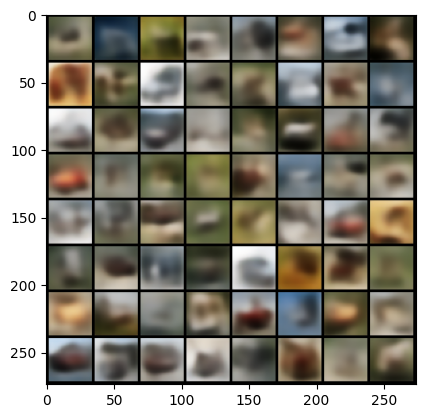

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def generate_samples(model_path, latent_dim, num_samples=64):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = ResNetVAE(latent_dim).to(device)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim).to(device)
        samples = model.decoder(z).cpu()

    save_image(samples, 'generated_samples.png', nrow=8, normalize=True)

    img = mpimg.imread('generated_samples.png')
    imgplot = plt.imshow(img)
    plt.show()

# Usage
generate_samples('models/resnet_vae_cifar10_best.pth', latent_dim=1024)

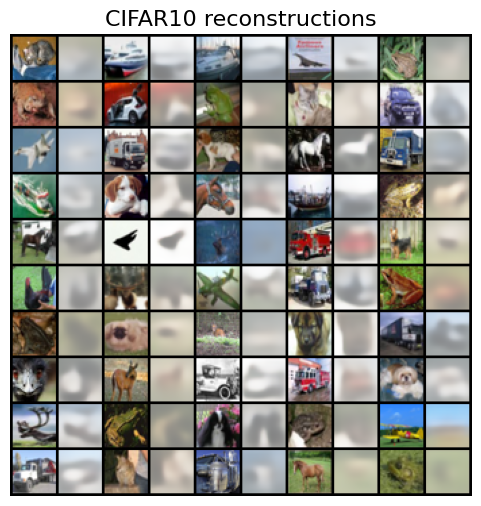

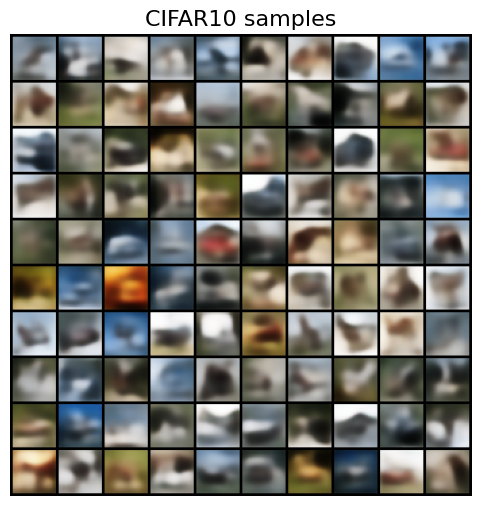

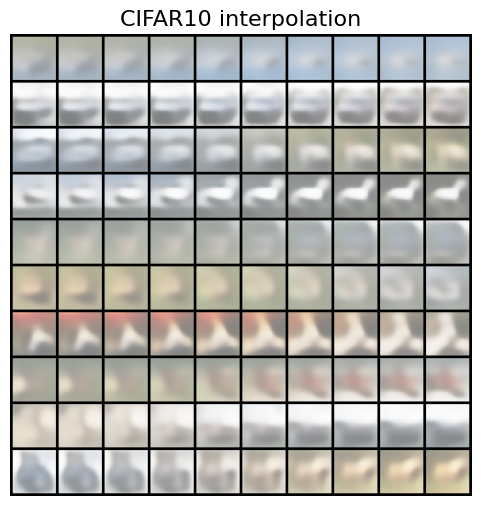

In [27]:
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1
train_loader = data.DataLoader(centered_train_data, batch_size=128, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=128)

model = ResNetVAE(1024).to('cuda')
model.load_state_dict(torch.load('models/resnet_vae_cifar10_best.pth'))

with torch.no_grad():
    z = torch.randn(100, 1024).to('cuda')
    samples = model.decoder(z).cpu()

x = next(iter(test_loader))[:50]

x = x.to('cuda')

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to('cuda')
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')